In [1]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
 
# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OFFICE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
filepath = 'C:/Users/OFFICE/Data_visualization/Detecting Spam Emails Using Tensorflow in Python/fraud_email_.csv'

In [5]:
email = pd.read_csv(filepath)

In [6]:
email.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [7]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


In [8]:
email.describe()

,Class
count,11929.000000
mean,0.434823
std,0.495754
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
email.shape

(11929, 2)

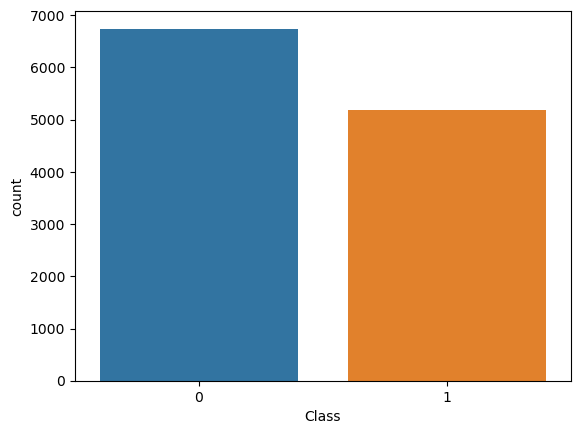

In [12]:
sns.countplot(x='Class', data=email)
plt.show()

Text(0.5, 0, 'Message types')

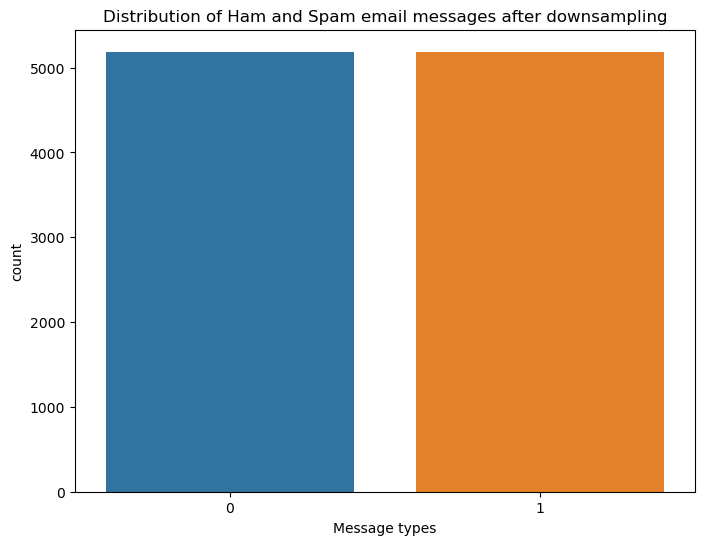

In [13]:
ham_msg = email[email.Class == 0]
spam_msg = email[email.Class == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)
 
# Plotting the counts of down sampled dataset
balanced_data = ham_msg.append(spam_msg)\
    .reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='Class')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [15]:
balanced_data['Text'] = balanced_data['Text'].str.replace('Subject', '')
balanced_data.head()

,Text,Class
0,I want to send the development speech as deliv...,0
1,FYI —POLITICOBoehner chief of staff dies at 46...,0
2,Here are some matters I haven't raised w you b...,0
3,Just the stuff from yesterday. Maybe one of th...,0
4,Will do.,0


In [18]:
import string

# Function to remove punctuations from text
def remove_punctuations(text):
    if isinstance(text, str):
        punctuations_list = string.punctuation
        temp = str.maketrans('', '', punctuations_list)
        return text.translate(temp)
    return text  # If the input is not a string, return it as is

# Apply the function to the 'Text' column
balanced_data['Text'] = balanced_data['Text'].astype(str).apply(remove_punctuations)

# Display the head of the dataframe
balanced_data.head()


,Text,Class
0,I want to send the development speech as deliv...,0
1,FYI —POLITICOBoehner chief of staff dies at 46...,0
2,Here are some matters I havent raised w you bu...,0
3,Just the stuff from yesterday Maybe one of the...,0
4,Will do,0


In [19]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        word = word.lower()
 
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
 
 
balanced_data['Text'] = balanced_data['Text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Text,Class
0,want send development speech delivered w note ...,0
1,fyi —politicoboehner chief staff dies 46by pat...,0
2,matters havent raised w wanted get reactionwas...,0
3,stuff yesterday maybe one cable nets talking h...,0
4,,0


In [23]:
# Function to plot word cloud
def plot_word_cloud(data, typ):
    # Convert all Text values to strings and join them into a single string
    email_corpus = " ".join(data['Text'].astype(str))

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()


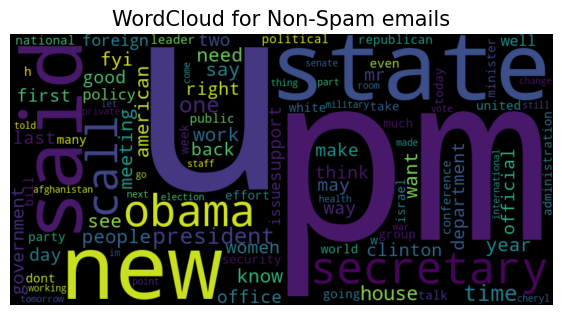

In [24]:
# Plot word clouds for Non-Spam and Spam emails
plot_word_cloud(balanced_data[balanced_data['Class'] == 0], typ='Non-Spam')

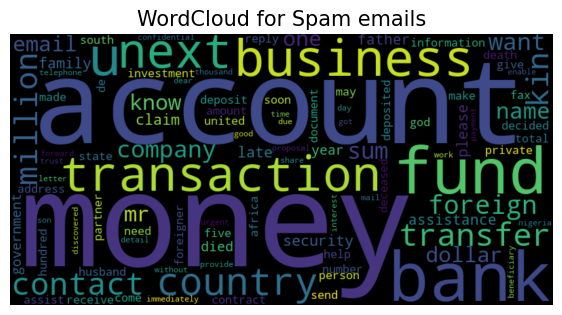

In [25]:
plot_word_cloud(balanced_data[balanced_data['Class'] == 1], typ='Spam')

In [26]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['Text'], balanced_data['Class'],test_size = 0.2,random_state = 42)

In [27]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)
 
# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)
 
# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')
test_sequences = pad_sequences(test_sequences,maxlen=max_len,padding='post',truncating='post')

In [28]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,output_dim=32,input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [30]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)
 
lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [31]:
# Train the model
history = model.fit(train_sequences, train_Y,validation_data=(test_sequences, test_Y),epochs=20,batch_size=32,callbacks = [lr, es])

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8255 - loss: 0.4927 - val_accuracy: 0.8482 - val_loss: 0.3791 - learning_rate: 0.0010
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9220 - loss: 0.2519 - val_accuracy: 0.9561 - val_loss: 0.1652 - learning_rate: 0.0010
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9637 - loss: 0.1413 - val_accuracy: 0.9571 - val_loss: 0.1657 - learning_rate: 0.0010
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9401 - loss: 0.1848 - val_accuracy: 0.9239 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9520 - loss: 0.1818 - val_accuracy: 0.9465 - val_loss: 0.1946 - learning_rate: 5.0000e-04
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9604 - loss: 0.1500 - val_accuracy: 0.9513 - val_loss: 0.1881 - learning_rate: 5.0000e-04


In [32]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9542 - loss: 0.1741
Test Loss : 0.16573907434940338
Test Accuracy : 0.9571084380149841


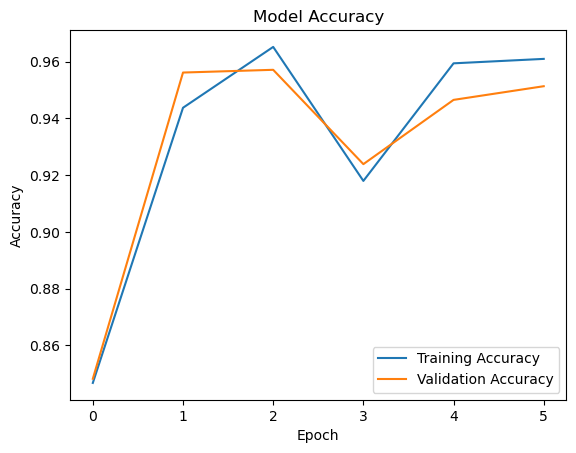

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

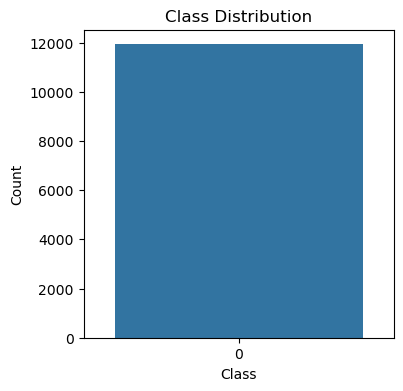

In [37]:
# Bar plot for class distribution
plt.figure(figsize=(4, 4))
sns.countplot(email['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

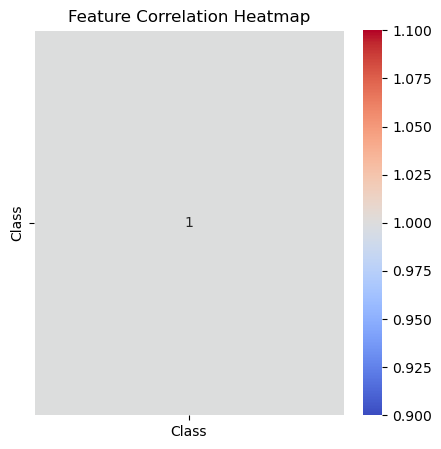

In [46]:
plt.figure(figsize=(5, 5))
correlation_matrix = email.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
